# Assignment by Pritha Majumder

In [1]:
#importing the pandas package and the libraries such as matplotlib and numpy for making the required function and plotting

import pandas as pd, matplotlib.pyplot as plt, numpy as np, math

In [2]:
#extracting the csv file and reading the file into data frame
df = pd.read_csv(r'C:\Users\psmaj\Desktop\interviewAssignment.csv')
df.head()

,ticker_exchange,date,price,entrVal,shares,fcfNtm,epsNtm,ebitdaNtm,ebitNtm,salesNtm,...,netIncNtm,netIncLtm,cffoNtm,salesCY0,salesCY3,metric1,entrVal/ebitdaNTM,entrVal/SalesNTM,Roe,pB.1
0,ABC-USA,2/28/2015,102.76,22263.73883,219.34088,1668.9937,4.853142,2048.3130,1845.2452,136616.95,...,1103.8673,974.04626,1976.6617,152832.40,149338.44,21.17391166,NaN,NaN,NaN,NaN
1,ABC-USA,3/31/2015,113.67,26632.24246,221.11012,1549.4333,4.947153,2093.1330,1881.1853,138380.28,...,1112.5739,981.83405,1891.1500,152832.40,150918.11,22.97685153,NaN,NaN,NaN,NaN
2,ABC-USA,4/30/2015,114.30,26770.59468,221.11012,1642.0598,5.246471,2215.2153,1996.0290,140687.77,...,1188.4678,1030.03760,2014.8319,154812.31,153489.73,21.78607504,NaN,NaN,NaN,NaN
3,ABC-USA,5/31/2015,112.56,26397.59915,221.11012,1625.2172,5.325835,2237.1802,2024.3136,141446.94,...,1202.6989,1045.87790,1983.0802,162952.20,153663.36,21.13471409,NaN,NaN,NaN,NaN
4,ABC-USA,6/30/2015,106.34,24556.37693,216.51753,1596.6022,5.396079,2289.2683,2078.0518,142463.25,...,1238.8656,1077.16880,1952.8080,162952.20,153663.36,19.70690345,NaN,NaN,NaN,NaN


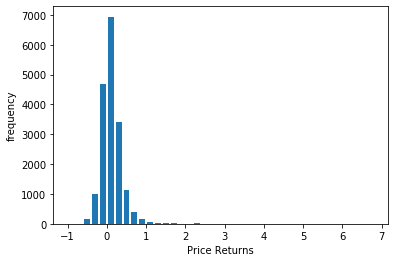

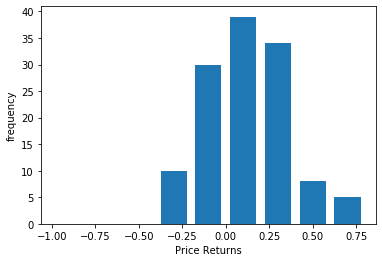

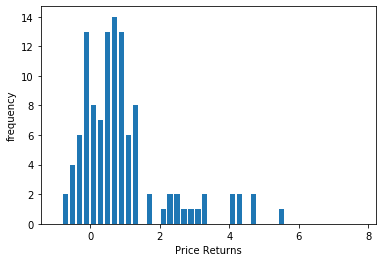

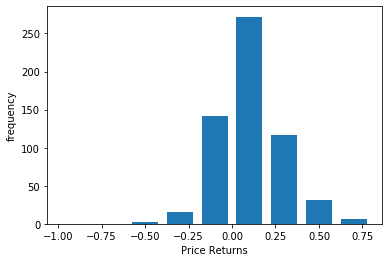

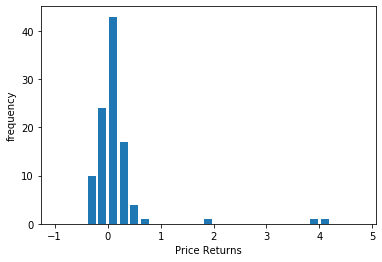

In [7]:
#the histogram function with parameters such as metric,value,timeframe and binsize

def get_histogram(metric, value, timeframe, bin_size):
    
#a dictionary of timeframe from where the required price return is picked based on the time for which the price return is observed    
    timeframe_to_col_dic = {1: "priceReturn1M", 3: "priceReturn3M", 6: "priceReturn6M", 12: "priceReturn12M"}
    
# assigning the criteria for binning the price return based on condition that metric> value 
    price_return_vals = [float(num) for num in pd.read_csv(r'C:\Users\psmaj\Desktop\interviewAssignment.csv').query(metric + ">" + str(value))[timeframe_to_col_dic[timeframe]].values.tolist() if num not in ["#VALUE!", "#DIV/0!"]]
    
# ploting the histogram function with labels   
    plt.hist(price_return_vals, bins=list(np.arange(math.floor(min(price_return_vals)), int(max(price_return_vals) + bin_size), bin_size)), rwidth=0.75)
    plt.ylabel('frequency')
    plt.xlabel('Price Returns')
    plt.show()
    
#a dictionary for parameters stating optimal values for each metric so that histogram is scaled appropriately    
params_dic = {'price/epsNtm': [30, 6, 0.2], 'entrVal/ebitdaNtm': [1200, 6, 0.2], 'entrVal/salesNtm': [2000, 6, 0.2], 'roe': [300, 6, 0.2], 'pB': [2000, 6, 0.2]}

#pick the key based on the value(parameters) from the dictionary and make the appropriate histogram
for key in params_dic.keys():
    get_histogram(key, *params_dic[key])

##### 1st Diagram:
Price/Earnings for next twelve months shows the price deflected by earnings per share.
So, from the diagram its seen that the ratio has a high frequency around 0. 
 So, the ratio is mostly less than 1 or nearing to negative which implies that price mstly supercedes the earning shares
by a great extent.
It implies a low forward P/E ratio that shows the stocks are undervalued in the market.
The distribution of the price returns for this metric and value is skewed leftwards.

    

#### 2nd  Diagram:
The entrVal is the value of a stock for Entropic Communications (NASDAQ Stock Exchange) and signifies the enterprice value.The ratio is similar to EV/EBITDA ratio and here is concentrated for price returns around 0 to 0.25. The distribution of the price returns for this metric and value is more or less centered.


#### 3rd  Diagram
The metric used in this histogram shows the a higher ratio would been the compnay has a higher value of stock in comparison to its sales.
The histogram is skewed leftward.

#### 4th  Diagram
The return on equity measures the financial performace of company and how effectively the company is using its assets.
The histogram is more or less centered and the price returns accumulate around 0 to 0.25

#### 5th Diagram
The price to Book ratio shows the higher the stock the higher the ratio and its mostly higher around 0.
The histogram is slightly skewed towards left.